In [1]:
import yt
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import pickle as pickle
from unyt import g,cm
from numpy.linalg import eig


In [2]:

with open('angle_new.pkl','rb')as f:
    angle = pickle.load(f)

with open('lyman_cul.pkl','rb')as f:
    lyman = pickle.load(f)

In [3]:
with open("new_value_total.pkl",'rb') as f:
    value = pickle.load(f)
with open("peak_locations_box_c.pkl",'rb') as f:
    peak = pickle.load(f)

In [17]:
#this is to clean any data that is outside of the box boundry
clean_data = []
for i in value:
    clean_data.append(i[0])
remove = np.loadtxt('remove.raw', skiprows=0)
for i in reversed(range(len(remove))):
    clean_data[int(remove[i])] = clean_data[-1]
    clean_data = clean_data[:-1]
for i in reversed(range(len(remove))):
    angle[int(remove[i])] = angle[-1]
    angle = angle[:-1]

In [18]:
#this is to arrange a,b,c in largest to smallest in the ellipsoid, they are all calculated from the eigenvalues 
a = []
for i in clean_data:
    a.append(np.sqrt((i[1]+i[2]-i[0])/2))
b = []
for i in clean_data:
    b.append(np.sqrt((i[0]+i[2]-i[1])/2))
c = []
for i in clean_data:
    c.append(np.sqrt((i[0]+i[1]-i[2])/2))
    largest = []
middle = []
smallest = []
temp = []
for i,j,k in zip(a,b,c):
    temp.append(i)
    temp.append(j)
    temp.append(k)
    temp.sort()
    middle.append(temp[1])
    largest.append(max(temp))
    smallest.append(min(temp))
    temp = []
a = largest
b = middle
c = smallest

In [19]:
ratio = np.divide(a,c)

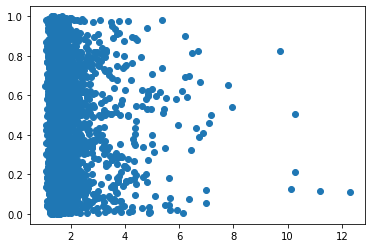

In [25]:
plt.scatter(ratio,angle)
